In [14]:
from os import listdir, mkdir
import matplotlib.pyplot as plt
from pathlib import Path

In [15]:
random_data_folder = Path("../data/random")

In [16]:
random_data_folder.resolve()

WindowsPath('D:/Software/Projects/Artificial Inteligence/hopfield-network/data/random')

In [248]:
def flatten_read_image(input_image):
    """

    :param input_image: black and white image imported with plt.imread() function
    :return: array of 0's and 1's describing imported image
    """
    prepared_image = []

    for element in input_image:
        element_flatten = []
        for row in element:
            element_flatten.append(row[0])
        prepared_image.append(element_flatten)

    prepared_image.reverse()
    return prepared_image

def import_images(path):
    imported_images = []

    for file in listdir(path):
        img = plt.imread(path.joinpath(file))
        flatten_image = flatten_read_image(img)
        imported_images.append(flatten_image)

    return imported_images

images = import_images(random_data_folder.joinpath("100x100"))

In [249]:
import matplotlib.cm as cm

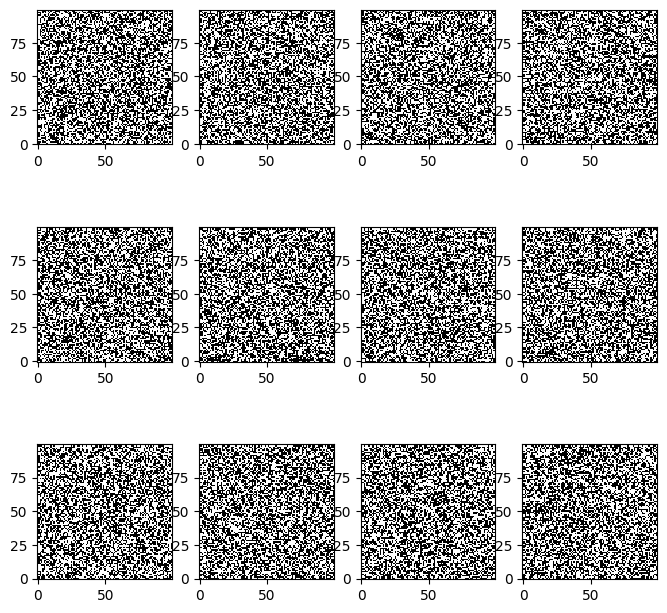

In [250]:
def show_images(images, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    for i, image in enumerate(images):
        plt.subplot(int(len(images)/columns), columns, i+1)
        plt.imshow(image,interpolation='none',cmap=color_map,origin='lower')
    plt.show()

cmap = cm.gray
show_images(images, cmap)

In [251]:
from hopfieldnetwork import HopfieldNetwork
import pandas as pd
import numpy as np

In [297]:
hopfield_network1 = HopfieldNetwork(N=100)

dataframe_images = []
for image in images:
    dataframe_images.append(pd.DataFrame(image))

train_data01 = dataframe_images[0]
train_data01[train_data01 == 0] = -1
train_data02 = dataframe_images[1]

hopfield_network1.train_pattern(train_data01)

In [298]:
train_data01

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
3,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
4,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
96,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
97,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
98,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [299]:
test_data = np.asarray(dataframe_images[1])

In [300]:
test_data

array([[0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.]], dtype=float32)

In [301]:
initial_state = np.random.random(100)*10
initial_state

array([3.79277002, 1.55001561, 0.09621825, 3.62211826, 8.67455887,
       7.49115107, 2.01621282, 2.21858057, 2.31926237, 5.80290355,
       6.77040637, 9.19460298, 1.84214787, 5.6481347 , 9.26321589,
       2.88962792, 2.73069831, 4.25214393, 9.753605  , 1.32945133,
       3.20683364, 2.36308859, 7.34896462, 8.95259513, 6.0185657 ,
       6.47800099, 4.36024528, 5.93735393, 6.81713815, 4.6694546 ,
       8.35983194, 3.95724892, 3.91264277, 8.64722324, 9.56403909,
       1.61546316, 2.39436013, 9.80331919, 4.29117562, 7.40377896,
       4.29444798, 9.05987767, 0.86452035, 3.00271143, 4.09064237,
       4.99886581, 2.72739737, 7.29416345, 8.49476006, 0.10959351,
       0.29291216, 7.75673089, 0.09169126, 7.39119415, 4.95992512,
       1.6364558 , 6.60087518, 5.13798575, 0.21332801, 9.71954738,
       5.49750279, 7.96365481, 7.98644579, 3.43688983, 9.96311187,
       0.08981301, 7.72991829, 1.34650572, 0.99311902, 3.30241459,
       9.2086563 , 3.42952383, 3.59727915, 5.4500069 , 1.35552

In [302]:
hopfield_network1.set_initial_neurons_state(initial_state)
hopfield_network1.update_neurons(iterations=100, mode='sync')

In [303]:
hopfield_network1.compute_energy(initial_state)

296.1519874583675

In [306]:
hopfield_network1.check_stability(train_data01)

TypeError: HopfieldNetwork.check_stability() missing 1 required positional argument: 'S'

In [305]:
hopfield_network1.save_network('network')

In [313]:
hopfield_network1.load_network("cross.npz")

In [315]:
test_data = pd.DataFrame([[-1,1,-1],[1,1,1], [-1,1,-1]]) # cross
hopfield_network1.check_stability(test_data)

ValueError: shapes (9,9) and (3,3) not aligned: 9 (dim 1) != 3 (dim 0)